# Spaceship Titanic KAGGLE
- In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

In [724]:
import pandas as pd
import numpy as np

In [725]:
#pour voir chaque ligne
pd.set_option('display.max_row', 111)
pd.set_option('display.max_columns', 111)

In [726]:
df=pd.read_csv(r'C:\Users\Gatsu\Desktop\Python\TitanicSpaceShip\train.csv')
df_test=pd.read_csv(r'C:\Users\Gatsu\Desktop\Python\TitanicSpaceShip\test.csv')
test2=pd.read_csv(r'C:\Users\Gatsu\Desktop\Python\TitanicSpaceShip\test.csv')

In [727]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [728]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# CHAPTER 1 : EDA 
- 8693 obs / 14 variables
## 6 variables num :
- Age - The age of the passenger.
- 1.RoomService
- 2.FoodCourt
- 3.ShoppingMall
- 4.Spa
- 5.VRDeck :  Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

## 7 var catégorielle :
- PassengerId : A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- Name - The first and last names of the passenger.

## Target variable : 
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [729]:
#Shape
print("Dimension de df :", df.shape)
print("\n")
print("Types de variables df :", df.dtypes.value_counts())

Dimension de df : (8693, 14)


Types de variables df : object     7
float64    6
bool       1
Name: count, dtype: int64


In [730]:
#Num / Cat variables :
numeric_variables = df.select_dtypes(include=['int64', 'float64']).columns
categorical_variables = df.select_dtypes(include=['object']).columns

In [731]:
#Description variable numériques
df[numeric_variables].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Number of transported/Non transported passengers

In [732]:
100*(df['Transported'].value_counts()/df.shape[0])

Transported
True     50.362361
False    49.637639
Name: count, dtype: float64

## Percentage of NaN for each variables

In [733]:
100*(df.isna().sum()/df.shape[0]).sort_values()
# 2% de valeur manquantes en moyenne. On pourra imputer lors de la pipeline

PassengerId     0.000000
Transported     0.000000
Age             2.059128
RoomService     2.082135
Destination     2.093639
FoodCourt       2.105142
Spa             2.105142
VRDeck          2.162660
Cabin           2.289198
Name            2.300702
HomePlanet      2.312205
VIP             2.335212
ShoppingMall    2.392730
CryoSleep       2.496261
dtype: float64

## 1.1 Distribution variable catégorielles : 

In [1]:
import matplotlib.pyplot as plt

#Enlever passager ID et Nom pour le diagramme
cat_var=categorical_variables.drop(['PassengerId','Name','Cabin'])
df[cat_var]

NameError: name 'categorical_variables' is not defined

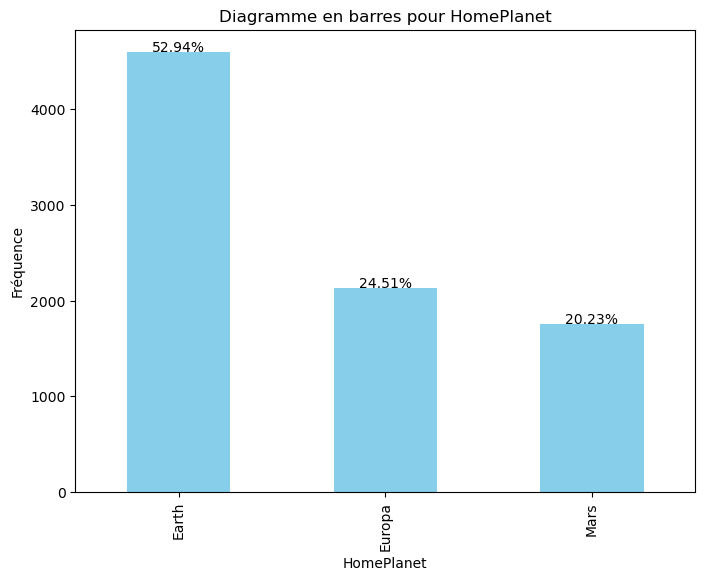

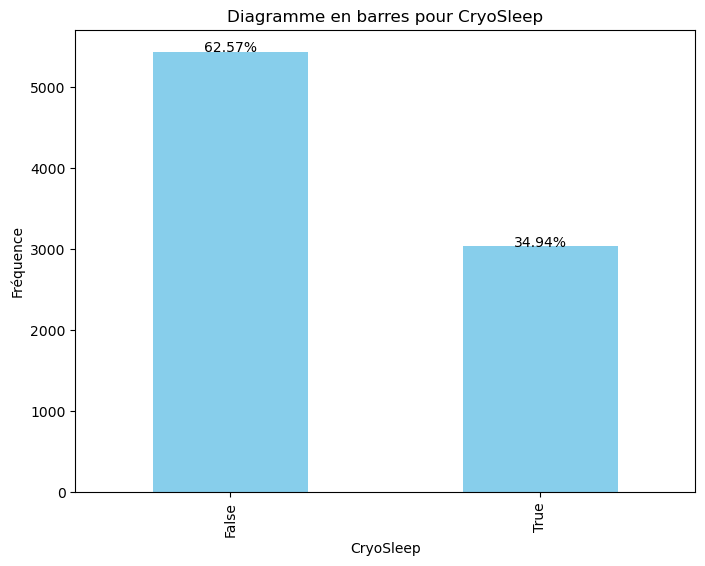

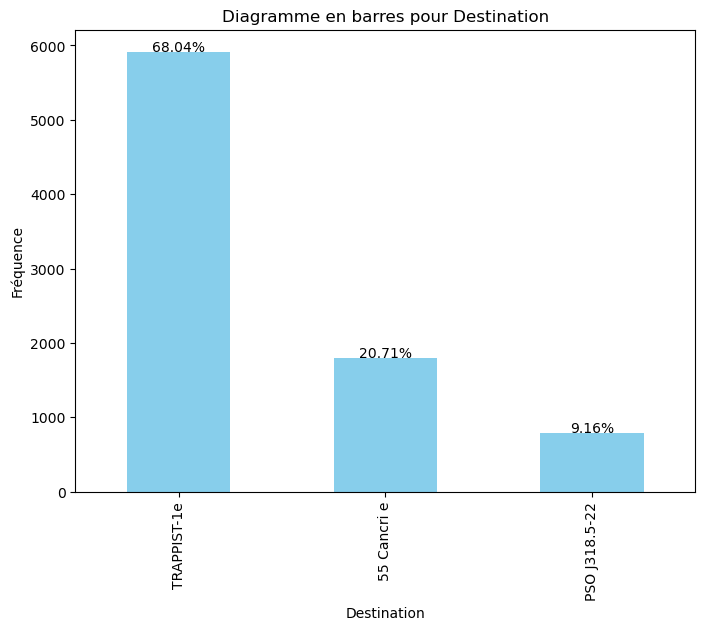

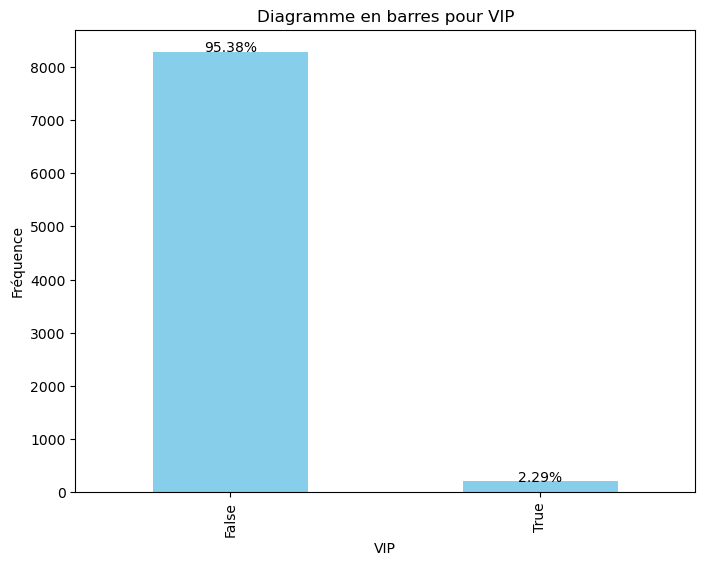

In [735]:
# Boucle pour créer des diagrammes en barres avec pourcentages pour chaque colonne catégorielle
for colonne in cat_var:
    plt.figure(figsize=(8, 6))
    total = len(df[colonne])
    counts = df[colonne].value_counts()

    # Calcul des pourcentages
    pourcentages = counts / total * 100

    # Création du diagramme en barres avec les pourcentages
    ax = counts.plot(kind='bar', color='skyblue')
    for i, v in enumerate(counts):
        ax.text(i, v + 1, f"{pourcentages[i]:.2f}%", ha='center')

    plt.title(f'Diagramme en barres pour {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
    plt.show()

## Analyse Bivariée (ft.Transported)

<Figure size 800x600 with 0 Axes>

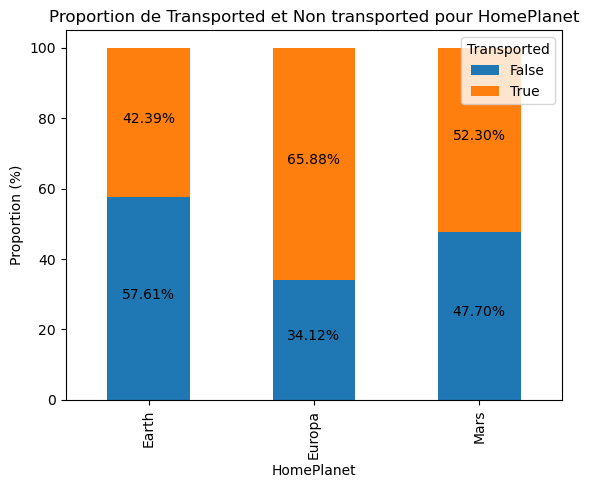

<Figure size 800x600 with 0 Axes>

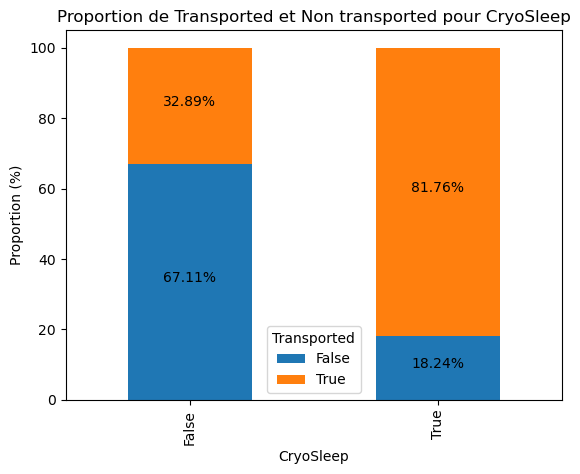

<Figure size 800x600 with 0 Axes>

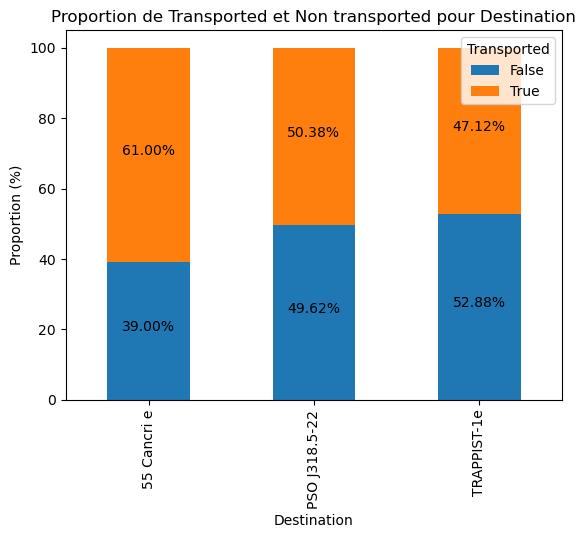

<Figure size 800x600 with 0 Axes>

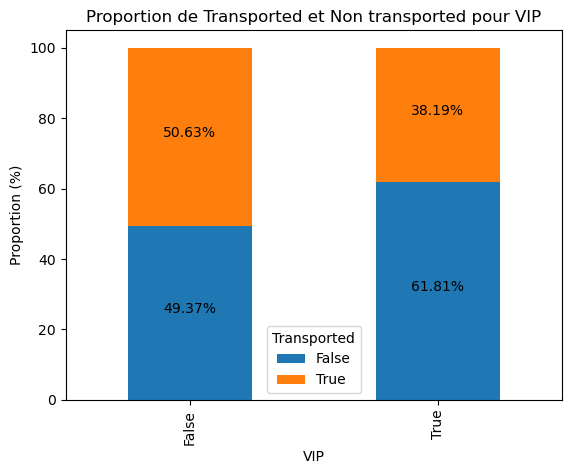

In [736]:
# Création du diagramme en barres pour les proportions de 'Transported' et 'Non transported'
for colonne in cat_var:
    plt.figure(figsize=(8, 6))

    # Calcul des proportions de 'Transported' et 'Non transported' pour chaque catégorie
    proportions = df.groupby(colonne)['Transported'].value_counts(normalize=True).unstack() * 100

    # Création du diagramme en barres
    ax = proportions.plot(kind='bar', stacked=True)
    
    # Positionnement des étiquettes de pourcentage
    for i in range(len(proportions)):
        total = 0
        for value in proportions.iloc[i]:
            if not pd.isnull(value):
                ax.text(i, total + value / 2, f"{value:.2f}%", ha='center')
                total += value

    plt.title(f'Proportion de Transported et Non transported pour {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Proportion (%)')
    plt.legend(title='Transported')
    plt.show()

## Remarque :
- Home planet : Les habitants de "Europa" ont + été transporté (66%), aussi pour Mars de manière moins significative (53%)
- Cryo Sleep : Ceux qui étaient en Cryo se sont fait largement et majoritairement Transporté (82%)
- Destination : Les passagers à destination de 55 Cancarie e 61% on été Téléporté
- VIP : Les VIP avaient moins de chance d'être téléporté (62% non TP)

## 1.2 Distribution variable Numériques : 

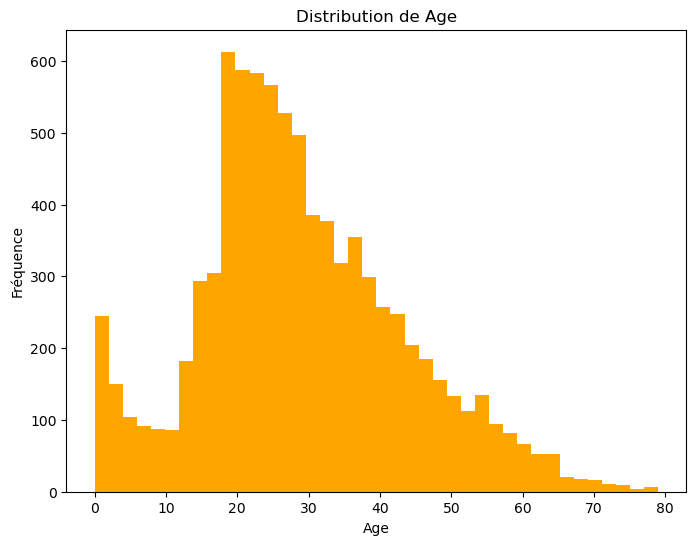

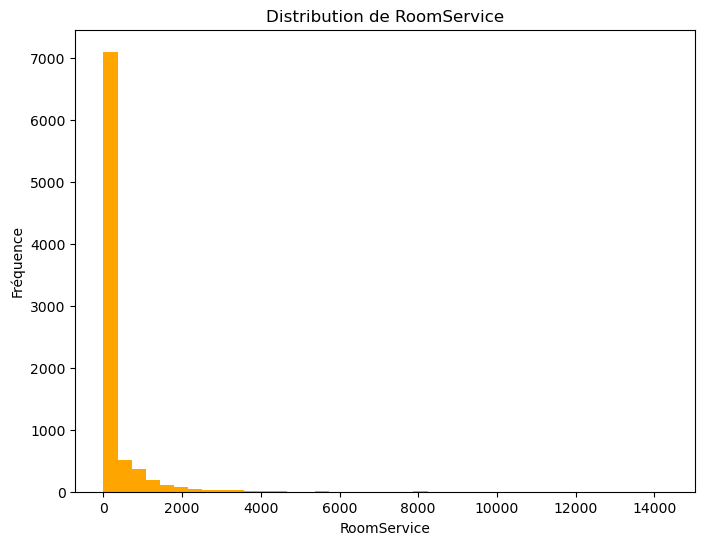

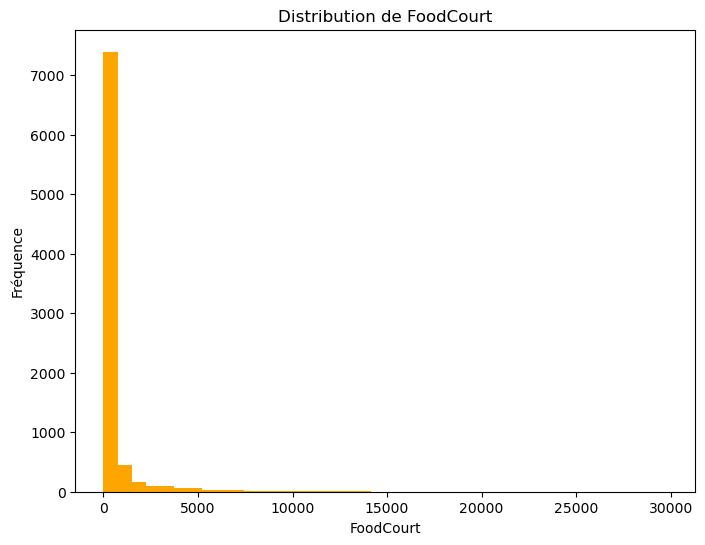

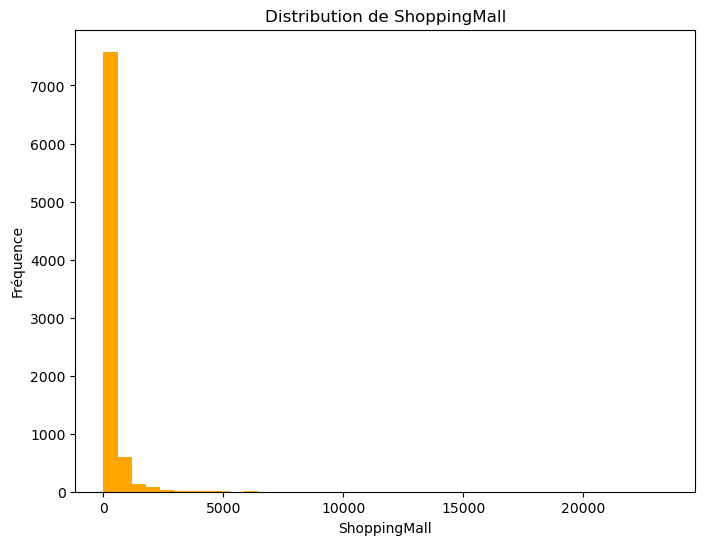

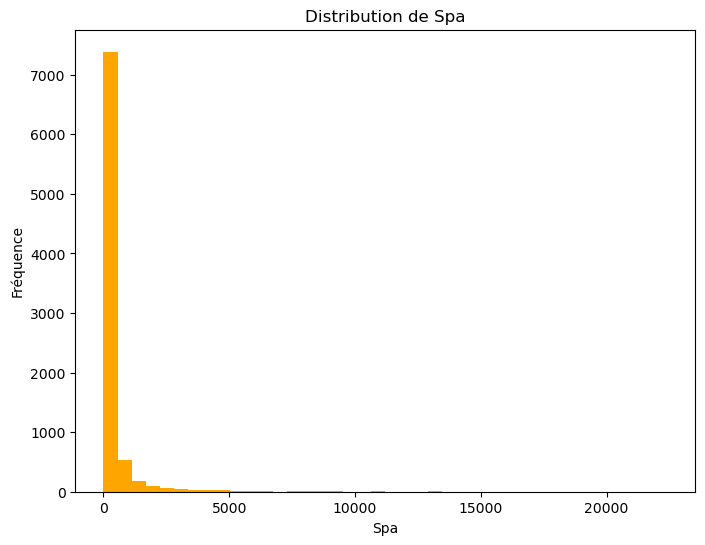

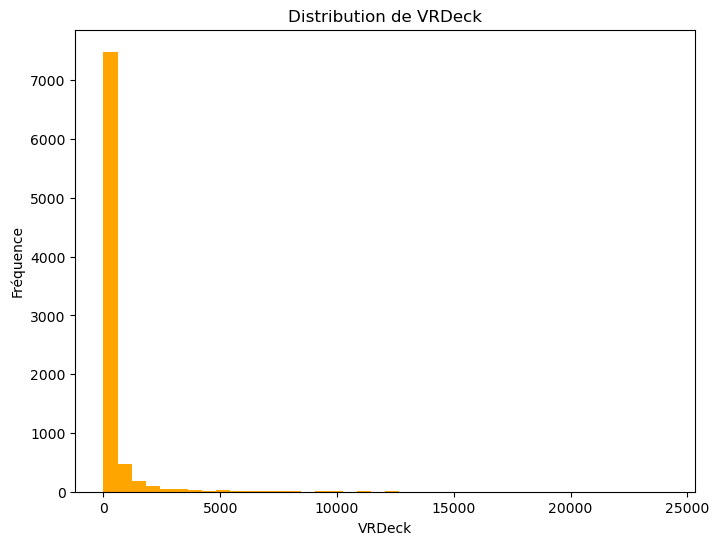

In [737]:
import seaborn as sns
# Création des graphiques de densité pour les variables numériques
for colonne in numeric_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(df[colonne], bins=40, color='orange')  # Adapter le nombre de bins selon votre préférence
    plt.title(f'Distribution de {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
    plt.show()

## 1.2.1 : Bivarié statistic

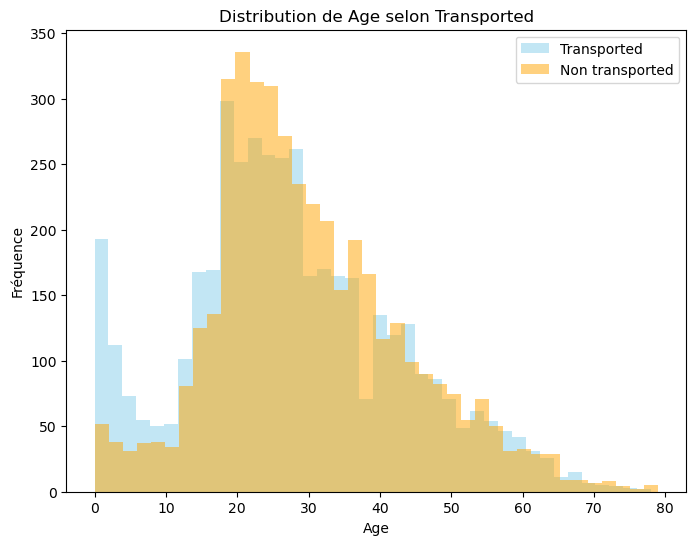

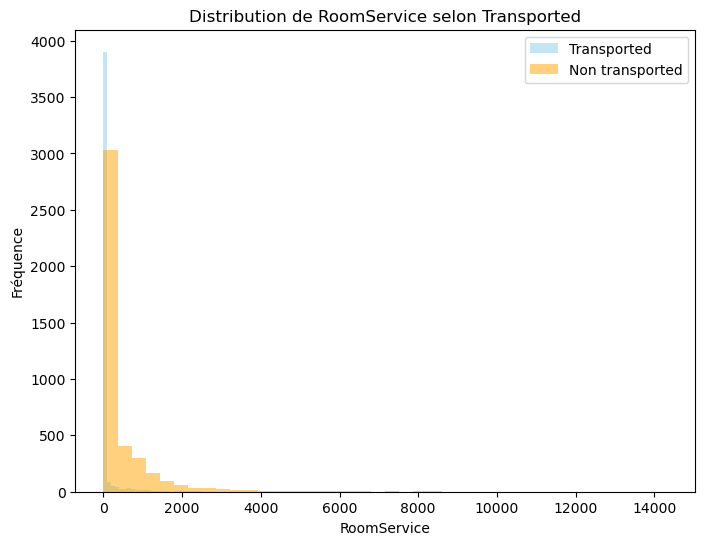

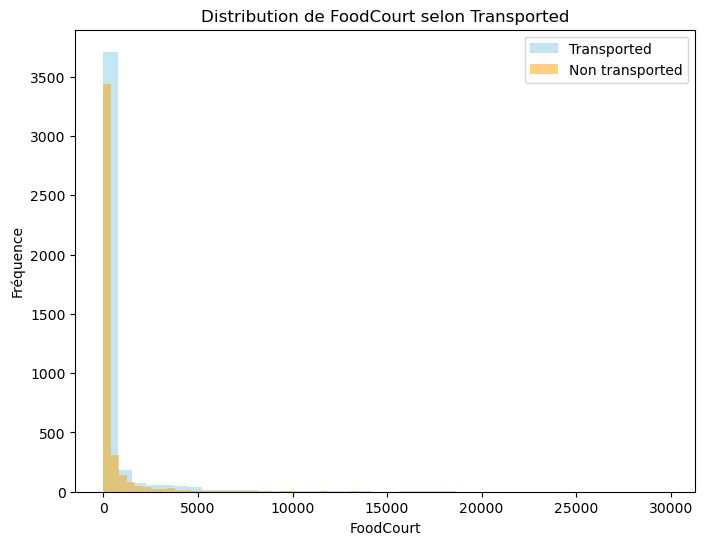

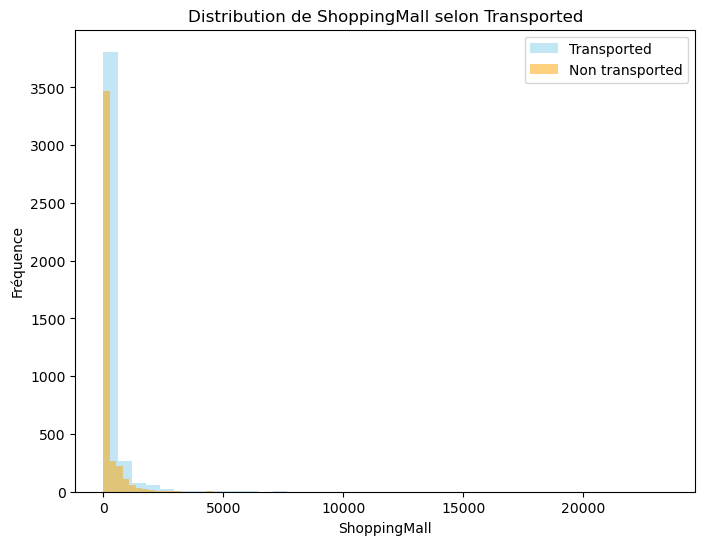

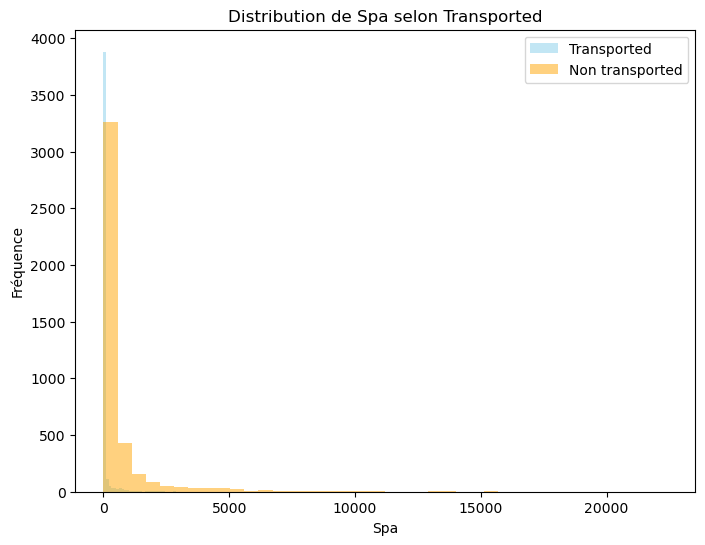

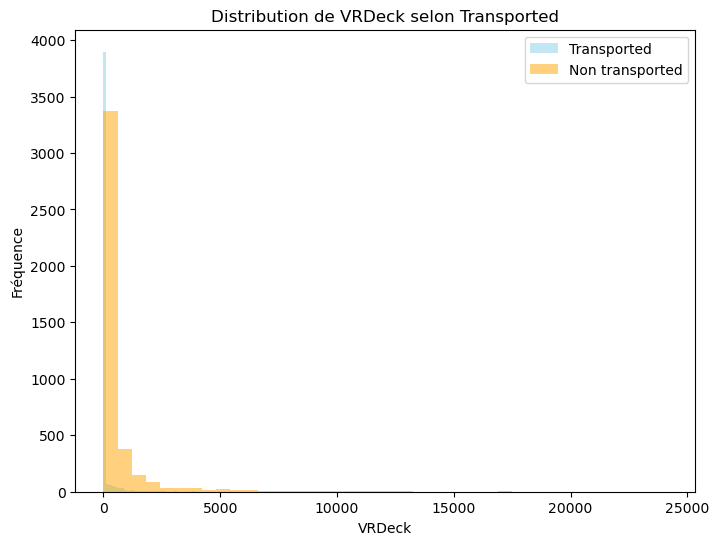

In [738]:
# Séparation des données en 'Transported' et 'Non transported'
transported_data = df[df['Transported'] == True]
non_transported_data = df[df['Transported'] == False]

# Création d'histogrammes pour chaque variable numérique séparée par 'Transported' et 'Non transported'
for colonne in numeric_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(transported_data[colonne], bins=40, alpha=0.5, label='Transported', color='skyblue')
    plt.hist(non_transported_data[colonne], bins=40, alpha=0.5, label='Non transported', color='orange')
    plt.title(f'Distribution de {colonne} selon Transported')
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

## Remarque :
- Les ages < 20 ont + été transporté que les autres
- Ceux qui ont payé + pour VRDeck / Spa / RoomService ont moi été transporté

## Matrice de Corrélation :

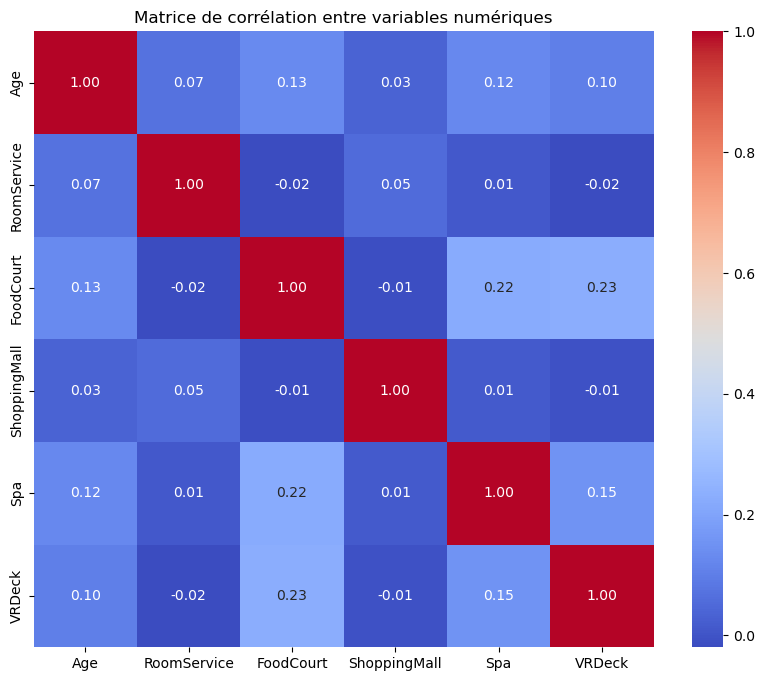

In [739]:
# Création de la matrice de corrélation
matrice_corr = df[numeric_variables].corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre variables numériques')
plt.show()

## Remarque :
- Pas de corrélation majeur entre var numérique

## 1.3 Analyse var : Passenger_ID / Cabin / Name
- On peut récupérer le groupe grâce à l'ID
- Les noms de familles pour rassembler les familles entre eux
- Récupérer info sur la variable cabin (Takes the form deck/num/side, where side can be either P for Port or S for Starboard)

# CHAPTER 2 : PRE-PROCESSING
- Création de nouvelle variable dans le train & test set

### 2.1 Création : Groupe_travel (Oui/Non)

In [740]:
# Création d'une nouvelle colonne avec les quatre premiers caractères de la colonne 'ID'
df['Groupe'] = df['PassengerId'].str[:4]
df_test['Groupe'] = df_test['PassengerId'].str[:4]

# Affichage des premières lignes pour vérification
print(df[['PassengerId', 'Groupe']].head())
print('\n')
print(df_test[['PassengerId', 'Groupe']].head())

  PassengerId Groupe
0     0001_01   0001
1     0002_01   0002
2     0003_01   0003
3     0003_02   0003
4     0004_01   0004


  PassengerId Groupe
0     0013_01   0013
1     0018_01   0018
2     0019_01   0019
3     0021_01   0021
4     0023_01   0023


In [741]:
##############   TRAIN

# Compter le nombre d'occurrences de chaque nom de famille
occurrences_groupe = df['Groupe'].value_counts()

# Créer une nouvelle colonne pour indiquer si les passagers voyagent en famille ou non
df['Groupe_travel'] = df['Groupe'].map(occurrences_groupe)

# Si le nombre d'occurrences est supérieur à 1, ils voyagent en famille, sinon non
df['Groupe_travel'] = df['Groupe_travel'].apply(lambda x: 1 if x > 1 else 0)

# Affichage des premières lignes pour vérification
print(df[['Groupe', 'Groupe_travel']].head())
print('\n')
#####################   TEST 

# Compter le nombre d'occurrences de chaque nom de famille
occurrences_groupe_test = df_test['Groupe'].value_counts()

# Créer une nouvelle colonne pour indiquer si les passagers voyagent en famille ou non
df_test['Groupe_travel'] = df_test['Groupe'].map(occurrences_groupe_test)

# Si le nombre d'occurrences est supérieur à 1, ils voyagent en famille, sinon non
df_test['Groupe_travel'] = df_test['Groupe_travel'].apply(lambda x: 1 if x > 1 else 0)

# Affichage des premières lignes pour vérification
print(df_test[['Groupe', 'Groupe_travel']].head())

  Groupe  Groupe_travel
0   0001              0
1   0002              0
2   0003              1
3   0003              1
4   0004              0


  Groupe  Groupe_travel
0   0013              0
1   0018              0
2   0019              0
3   0021              0
4   0023              0


### 2.2 Création variable "Famille" (Voyage en famille Oui / Non)

In [742]:
# Création d'une nouvelle colonne pour le nom de famille en utilisant la fonction split
df['NomFamille']=df['Name'].str.split(' ').str[1]
df_test['NomFamille']=df_test['Name'].str.split(' ').str[1]

# Affichage des premières lignes pour vérification
print(df[['Name', 'NomFamille']].head())
print('\n')
print(df_test[['Name', 'NomFamille']].head())

                Name   NomFamille
0    Maham Ofracculy    Ofracculy
1       Juanna Vines        Vines
2      Altark Susent       Susent
3       Solam Susent       Susent
4  Willy Santantines  Santantines


               Name NomFamille
0   Nelly Carsoning  Carsoning
1    Lerome Peckers    Peckers
2   Sabih Unhearfus  Unhearfus
3  Meratz Caltilter  Caltilter
4   Brence Harperez   Harperez


In [743]:
################ TRAIN

# Compter le nombre d'occurrences de chaque nom de famille
occurrences_nom_famille = df['NomFamille'].value_counts()

# Créer une nouvelle colonne pour indiquer si les passagers voyagent en famille ou non
df['Famille'] = df['NomFamille'].map(occurrences_nom_famille)

# Si le nombre d'occurrences est supérieur à 1, ils voyagent en famille, sinon non
df['Famille'] = df['Famille'].apply(lambda x: 1 if x > 1 else 0)

# Affichage des premières lignes pour vérification
print(df[['NomFamille', 'Famille']].head())
print('\n')

############### TEST 
# Compter le nombre d'occurrences de chaque nom de famille
occurrences_nom_famille_test = df_test['NomFamille'].value_counts()

# Créer une nouvelle colonne pour indiquer si les passagers voyagent en famille ou non
df_test['Famille'] = df_test['NomFamille'].map(occurrences_nom_famille_test)

# Si le nombre d'occurrences est supérieur à 1, ils voyagent en famille, sinon non
df_test['Famille'] = df_test['Famille'].apply(lambda x: 1 if x > 1 else 0)

# Affichage des premières lignes pour vérification
print(df_test[['NomFamille', 'Famille']].head())

    NomFamille  Famille
0    Ofracculy        0
1        Vines        1
2       Susent        1
3       Susent        1
4  Santantines        1


  NomFamille  Famille
0  Carsoning        1
1    Peckers        0
2  Unhearfus        0
3  Caltilter        0
4   Harperez        1


### 2.3 Création variable Solo (Solo traveler)

In [744]:
#Train
# Création de la variable 'Solo' avec des conditions logiques
df['Solo'] = (df['Famille'] == 0) & (df['Groupe_travel'] == 0)
df_test['Solo'] = (df_test['Famille'] == 0) & (df_test['Groupe_travel'] == 0)

# Conversion des valeurs booléennes en entiers (1 pour True, 0 pour False)
df['Solo'] = df['Solo'].astype(int)
df_test['Solo'] = df_test['Solo'].astype(int)

# Affichage des premières lignes pour vérification
print(df[['Famille', 'Groupe_travel', 'Solo']].head())
print('\n')
print(df_test[['Famille', 'Groupe_travel', 'Solo']].head())

   Famille  Groupe_travel  Solo
0        0              0     1
1        1              0     0
2        1              1     0
3        1              1     0
4        1              0     0


   Famille  Groupe_travel  Solo
0        1              0     0
1        0              0     1
2        0              0     1
3        0              0     1
4        1              0     0


### 2.4 Cabin : Création de 3 variables
- Deck (Bureau)
- Num (Numéro)
- Side (S/P)

In [745]:
#Train

# Création de la colonne 'Deck' pour récupérer la première lettre 
df['Deck'] = df['Cabin'].str[0]

# Création de la colonne 'Num' pour récupérer la partie numérique 
df['Num'] = df['Cabin'].str[2:].str.split('/', expand=True)[0]

# Création de la colonne 'Side' pour récupérer la partie Side
df['Side'] = df['Cabin'].str[-1]

# Affichage des premières lignes pour vérification
print(df[['Cabin', 'Deck', 'Num', 'Side']].head())

### TEST ###
print('\n')
# Création de la colonne 'Deck' pour récupérer la première lettre 
df_test['Deck'] = df_test['Cabin'].str[0]

# Création de la colonne 'Num' pour récupérer la partie numérique 
df_test['Num'] = df_test['Cabin'].str[2:].str.split('/', expand=True)[0]

# Création de la colonne 'Side' pour récupérer la partie Side
df_test['Side'] = df_test['Cabin'].str[-1]

# Affichage des premières lignes pour vérification
print(df_test[['Cabin', 'Deck', 'Num', 'Side']].head())

   Cabin Deck Num Side
0  B/0/P    B   0    P
1  F/0/S    F   0    S
2  A/0/S    A   0    S
3  A/0/S    A   0    S
4  F/1/S    F   1    S


   Cabin Deck Num Side
0  G/3/S    G   3    S
1  F/4/S    F   4    S
2  C/0/S    C   0    S
3  C/1/S    C   1    S
4  F/5/S    F   5    S


In [746]:
#TRAIN SET
col_change=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

# Création des variables catégorielles
for col in num_col_change:
    new_col_name = col + '_pay'
    df[new_col_name] = (df[col] > 0).astype(int)

In [747]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Groupe,Groupe_travel,NomFamille,Famille,Solo,Deck,Num,Side,RoomService_pay,FoodCourt_pay,ShoppingMall_pay,Spa_pay,VRDeck_pay
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,0,Ofracculy,0,1,B,0,P,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,0,Vines,1,0,F,0,S,1,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,1,Susent,1,0,A,0,S,1,1,0,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,1,Susent,1,0,A,0,S,0,1,1,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,0,Santantines,1,0,F,1,S,1,1,1,1,1


In [748]:
# Liste des colonnes à vérifier
columns_to_check = ['RoomService_pay', 'FoodCourt_pay', 'ShoppingMall_pay', 'Spa_pay', 'VRDeck_pay']

for index, row in df.iterrows():
    count = sum(row[col] for col in columns_to_check)  # Comptage du nombre de variables qui valent 1
    df.at[index, 'Social_Status'] = count if count > 0 else 0  # Ajustement pour refléter correctement le total

df['Social_Status'].head()

0    0.0
1    5.0
2    4.0
3    4.0
4    5.0
Name: Social_Status, dtype: float64

In [749]:
#Même chose pour test set :
# Création des variables catégorielles
for col in num_col_change:
    new_col_name = col + '_pay'
    df_test[new_col_name] = (df_test[col] > 0).astype(int)

In [750]:
# Liste des colonnes à vérifier
columns_to_check = ['RoomService_pay', 'FoodCourt_pay', 'ShoppingMall_pay', 'Spa_pay', 'VRDeck_pay']

for index, row in df_test.iterrows():
    count = sum(row[col] for col in columns_to_check)  # Comptage du nombre de variables qui valent 1
    df_test.at[index, 'Social_Status'] = count if count > 0 else 0  # Ajustement pour refléter correctement le total

df_test['Social_Status'].head()

0    0.0
1    2.0
2    0.0
3    3.0
4    2.0
Name: Social_Status, dtype: float64

## 2.5 : Représentation visuelle des nouvelles variables

In [751]:
#Nouvelles variables :
new_cat_variables=['Groupe_travel','Famille','Solo','Deck','Side','Social_Status']

<Figure size 800x600 with 0 Axes>

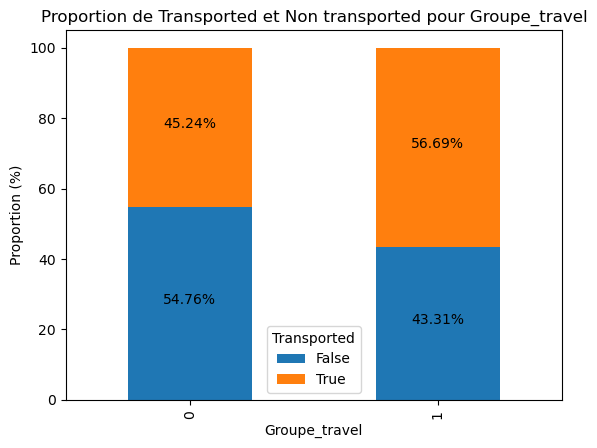

<Figure size 800x600 with 0 Axes>

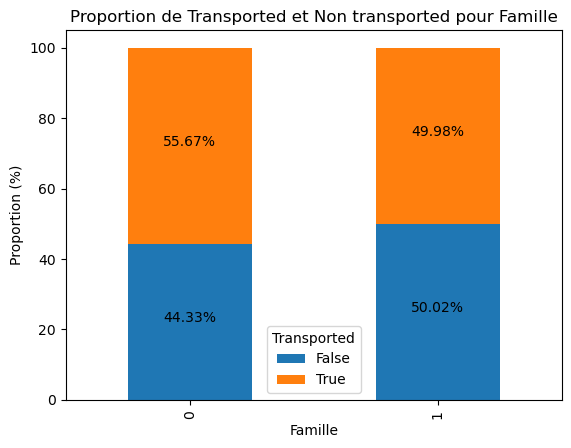

<Figure size 800x600 with 0 Axes>

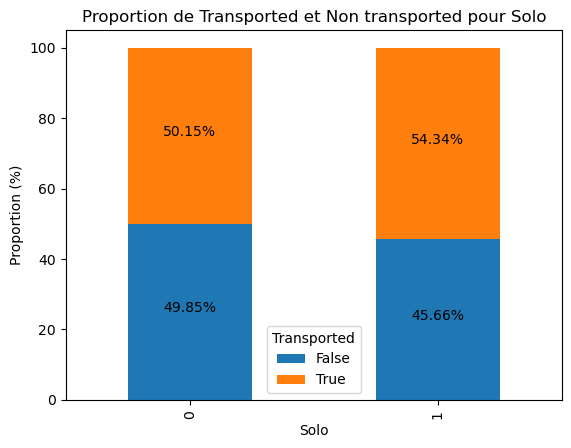

<Figure size 800x600 with 0 Axes>

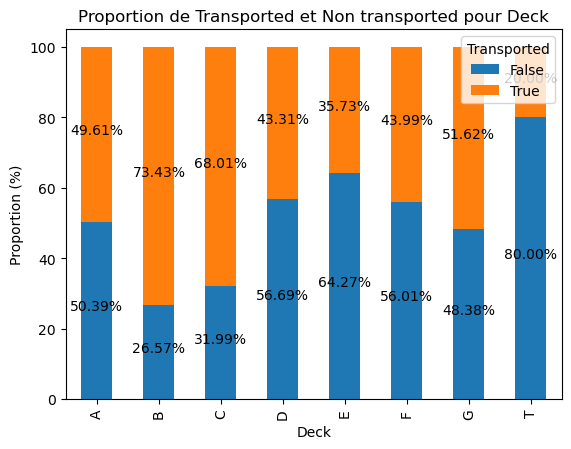

<Figure size 800x600 with 0 Axes>

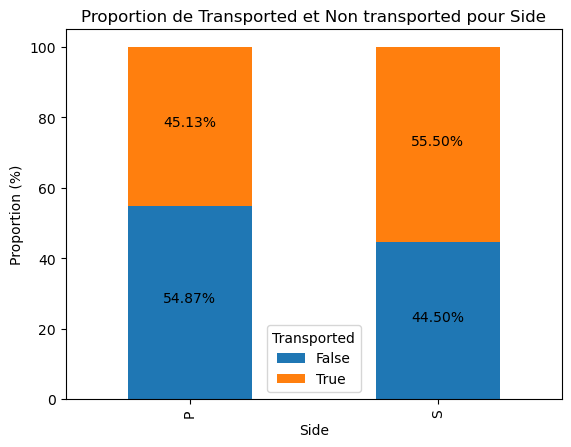

<Figure size 800x600 with 0 Axes>

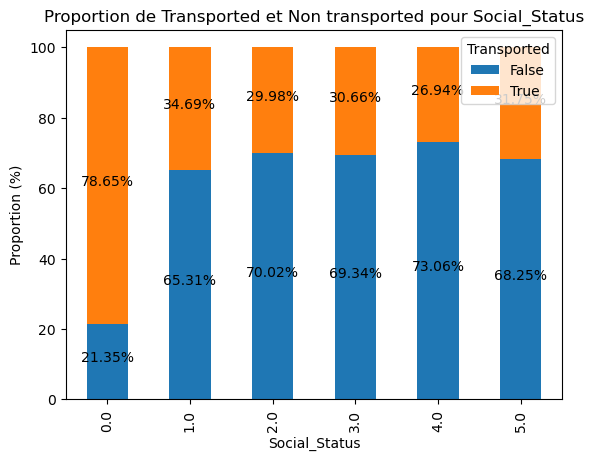

In [752]:
# Création du diagramme en barres pour les proportions de 'Transported' et 'Non transported'
for colonne in new_cat_variables:
    plt.figure(figsize=(8, 6))

    # Calcul des proportions de 'Transported' et 'Non transported' pour chaque catégorie
    proportions = df.groupby(colonne)['Transported'].value_counts(normalize=True).unstack() * 100

    # Création du diagramme en barres
    ax = proportions.plot(kind='bar', stacked=True)
    
    # Positionnement des étiquettes de pourcentage
    for i in range(len(proportions)):
        total = 0
        for value in proportions.iloc[i]:
            if not pd.isnull(value):
                ax.text(i, total + value / 2, f"{value:.2f}%", ha='center')
                total += value

    plt.title(f'Proportion de Transported et Non transported pour {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Proportion (%)')
    plt.legend(title='Transported')
    plt.show()

## Remarques :
- Groupe : Ceux voyageant en groupe avait + de chance d'être transporté
- Famille : Ceux voyageant pas en famille avait + de chance d'être transporté
- Solo : Ceux voyageant Solitaire avait + de chance d'être transporté

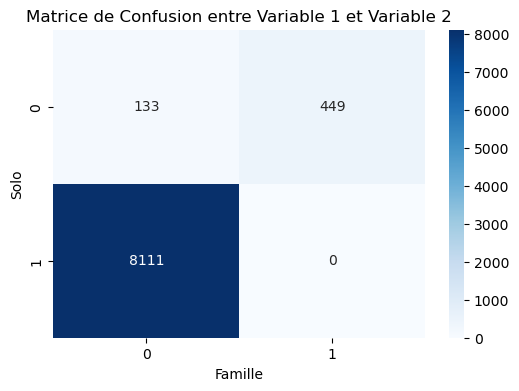

In [753]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#Solo et famille potentiellement corrélé :
# Création de la matrice de confusion
matrice_confusion = confusion_matrix(df['Famille'], df['Solo'])

# Création de la heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(matrice_confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Famille')
plt.ylabel('Solo')
plt.title('Matrice de Confusion entre Variable 1 et Variable 2')
plt.show()

- Il y a 133 personnes qui voyagent en groupe mais pas en famille

## 2.2 : Nettoyage / Encodage / Split

### 2.2.1 : Nettoyage

In [755]:
# On supprime les variables inutiles (train & test)
df.drop(['PassengerId','Name','Groupe','NomFamille','Num','Cabin','RoomService_pay','FoodCourt_pay','ShoppingMall_pay','Spa_pay','VRDeck_pay'], axis=1,inplace=True)
df_test.drop(['PassengerId','Name','Groupe','NomFamille','Num','Cabin','RoomService_pay','FoodCourt_pay','ShoppingMall_pay','Spa_pay','VRDeck_pay'], axis=1,inplace=True)

In [762]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupe_travel,Famille,Solo,Deck,Side,Social_Status
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1,B,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,1,0,F,S,5.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,1,0,A,S,4.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,1,0,A,S,4.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,1,0,F,S,5.0


In [767]:
#Recréation cat_columns et num_columns
cat_features=['HomePlanet','CryoSleep','Destination','VIP','Famille','Groupe_travel','Deck','Side','Famille','Solo']
num_features=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
ord_features=['Social_Status']

#Verif
len(cat_features)+len(num_features)+len(ord_features)==df.shape[1]

True

In [768]:
#Transformation binaire de ma variable target Y
df['Transported'] = df['Transported'].astype(int)

### 2.2.2 : Pipeline transformation

In [660]:
# Pipeline preprocessing : Impute numeric value with median, impute categorical value with MostFrequent and one hot 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split

In [769]:
#Pipeline pour les données numérique
num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

In [770]:
#Pipeline pour les données catégorielle ordinal

ode_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
])

In [771]:
#Pipeline pour les données catégorielle en one hot encoder

ohe_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

In [772]:
#Transformer qui transforme mes 3 type de colonnes

col_trans = ColumnTransformer(transformers=[
    ("num_p", num_pipeline, num_features),
    ("ode_p", ode_pipeline, ord_features),
    ("ohe_p", ohe_pipeline, cat_features),
], 
    remainder="passthrough",
    n_jobs=-1
)

In [773]:
# Pipeline complète avec le préprocesseur et tout autre modèle souhaité
full_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    # Ajoute ici ton modèle après le preprocessing si nécessaire
])

## 2.2.3 : Split

In [774]:
#Séparation X (features) avec les y (target)

X = df.drop("Transported", axis=1)
y = df["Transported"]

In [775]:
#Dim verif
print("X Shape :", X.shape)
print("y Shape :", y.shape)

X Shape : (8693, 16)
y Shape : (8693,)


In [776]:
#Just a look of our X data set before transformation
X.head()
#Seems OK

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupe_travel,Famille,Solo,Deck,Side,Social_Status
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,B,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0,1,0,F,S,5.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,1,0,A,S,4.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,1,0,A,S,4.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0,1,0,F,S,5.0


In [777]:
#Application de la pipeline sur X
X_preprocessed = full_pipeline.fit_transform(X)

In [778]:
#Shape verif
X_preprocessed.shape

(8693, 35)

In [779]:
#Verif pas de NaN

# Vérification des valeurs NaN dans le tableau
nan_present = np.isnan(X_preprocessed).any()

# Affichage du résultat
if nan_present:
    print("Il y a des valeurs NaN dans le tableau.")
else:
    print("Il n'y a pas de valeurs NaN dans le tableau.")

Il n'y a pas de valeurs NaN dans le tableau.


In [780]:
#Split X train/test et Y train/test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [781]:
print("X train dim: ", X_train.shape)
print("Y train dim: ", y_train.shape)
print("X test dim: " , X_test.shape)
print("X test dim: " , y_test.shape)
#Semble OK

X train dim:  (6954, 35)
Y train dim:  (6954,)
X test dim:  (1739, 35)
X test dim:  (1739,)


# CHAPTER 3 : MODELING

In [674]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [309]:
# Définition des modèles à tester
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Paramètres à tester pour chaque modèle
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 7],
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
}

In [310]:
# Application de GridSearchCV pour chaque modèle
results = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    accuracy = grid_search.score(X_test, y_test)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_accuracy': accuracy
    }
    print(f"Classifier: {model_name}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")
    print(f"Test accuracy: {accuracy}")
    print("----------------------------------------")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Classifier: RandomForest
Best parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8093202447387885
Test accuracy: 0.7860839562967222
----------------------------------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classifier: GradientBoosting
Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.8067305235610218
Test accuracy: 0.78205865439908
----------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Classifier: LogisticRegression
Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.793502112759828
Test accuracy: 0.7849338700402531
----------------------------------------


C:\Users\Gatsu\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gatsu\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gatsu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Gatsu\AppData\Roaming\Python\Python311\site-p

In [783]:
import warnings
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Suppress LightGBM warnings
warnings.filterwarnings('ignore')

# Define the LightGBM classifier
lgbm = LGBMClassifier()

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train, y_train)
accuracy = grid_search.score(X_test, y_test)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1414
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [782]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
# Define the XGBoost classifier
xgb = XGBClassifier()

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)
accuracy = grid_search.score(X_test, y_test)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy Score: 0.8083117630140926


In [784]:
best_model = grid_search.best_estimator_
best_model

LGBMClassifier(colsample_bytree=0.8, max_depth=4, subsample=0.8)

## Learning curve de notre modèle

In [785]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

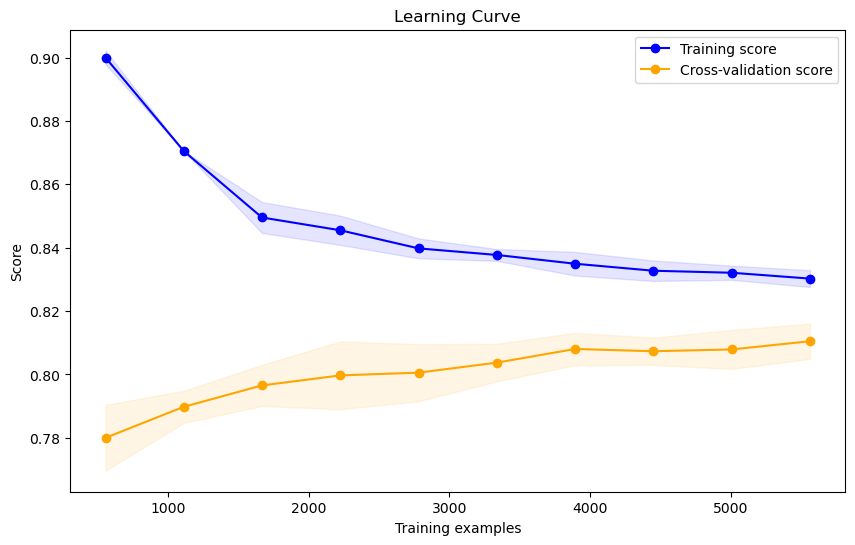

In [786]:

# Définir différentes tailles d'ensemble d'entraînement pour la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calculer la moyenne et l'écart-type des scores sur les ensembles d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

## CHAPTER 4 : SUBMIT 

In [787]:
#Preprocessed au test set :
test_preprocessed = full_pipeline.fit_transform(df_test)
test_preprocessed.shape

(4277, 35)

In [788]:
#Prédiction
y_pred=best_model.predict(test_preprocessed)

In [789]:
#Submission
df_out_Spaceshit = test2[['PassengerId']].copy()
df_out_Spaceshit['Transported'] = y_pred

In [790]:
#On demande d'avoir la variable Transported en bolean
df_out_Spaceshit['Transported'] = df_out_Spaceshit['Transported'].astype(bool)

In [791]:
df_out_Spaceshit.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [792]:
#Export
df_out_Spaceshit.to_csv(r'C:\Users\Gatsu\Desktop\Python\TitanicSpaceShip\SpaceSHip_Ceb_out.csv', index=False)